In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import resample
pd.set_option('display.max_columns',100)

In [2]:
#Using pandas to import XYZ Corp's dataset
data = pd.read_csv('XYZCorp_LendingData.csv',parse_dates=['issue_d'])

/usr/local/Cellar/ipython/7.7.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking dimensions
data.shape

(855969, 73)

In [4]:
#previewing dataset
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
#Dropping Columns that have more than 65% null vaues
nulls = dict(data.isnull().sum()/len(data)*100)
drops = []
for i in nulls:
    if nulls[i] > 65:
        drops.append(i)
drops

['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [6]:
#Checking for left-over drops
data = data.drop(columns=drops)
data.isnull().sum()/len(data)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.776261
emp_length                     5.030673
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.003855
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000


In [7]:
#Previewing the dataset
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0


In [8]:
#Filling null values in columns where appropriate
data.emp_length = data.emp_length.fillna('0')
data.revol_util = data.revol_util.fillna('0')

In [9]:
#Refining dataset to remove Total Current Balance Nulls
data = data[data.tot_cur_bal.notnull()]
data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      45277
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             22
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        395906
open_acc                           0
p

In [10]:
#Dropping columns deemed unnecessary for model
data = data.drop(columns=['id','addr_state','policy_code','purpose','zip_code','title','member_id','emp_title','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','next_pymnt_d','mths_since_last_delinq'])

In [11]:
#Dropping all remaining nulls
data = data.dropna()

In [12]:
#Null Check
data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

In [13]:
#previewing the dataset
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050,27050,27050.0,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,Dec-13,n,22.87,0,Oct-86,0,14,0,36638,61.2,27,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,114834.0,59900.0,0
39695,9750,9750,9750.0,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,Dec-13,n,25.12,0,Jan-07,0,12,0,7967,52.8,28,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,14123.0,15100.0,0
39696,12000,12000,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,Dec-13,n,14.05,0,Mar-94,1,12,0,13168,21.6,22,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,267646.0,61100.0,0
39697,12000,12000,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,Dec-13,n,16.94,0,Oct-98,0,7,2,5572,68.8,32,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,0.0,INDIVIDUAL,0,15386.0,13605.0,8100.0,0
39698,15000,15000,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,Dec-13,n,16.51,0,Mar-98,0,8,0,11431,74.2,29,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,0.0,INDIVIDUAL,0,1514.0,272492.0,15400.0,0


In [14]:
#Cleaning employment length column for numerical values and cnverting columns to appropriate data types.
data['emp_length'] = data['emp_length'].str.replace('\D*\W* years*','').str.replace('< ','')
data['emp_length'] = data['emp_length'].astype('int64')
data['revol_util'] = data['revol_util'].astype('int64')

In [15]:
#Cleaning Verification Status column
data.verification_status = data.verification_status.str.replace('Source Verified','Verified')

In [16]:
#Importing preprocessor for conversions
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['term','home_ownership','verification_status','pymnt_plan','application_type',
        'initial_list_status']
data = pd.get_dummies(data, columns= cols,dtype = 'int64')


In [17]:
#Dataset Check
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w
39694,27050,27050,27050.0,10.99,885.46,B,B2,10,55000.0,Dec-13,22.87,0,Oct-86,0,14,0,36638,61,27,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,0.0,0,0.0,114834.0,59900.0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1
39695,9750,9750,9750.0,13.98,333.14,C,C1,1,26000.0,Dec-13,25.12,0,Jan-07,0,12,0,7967,52,28,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,0.0,0,0.0,14123.0,15100.0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
39696,12000,12000,12000.0,6.62,368.45,A,A2,10,105000.0,Dec-13,14.05,0,Mar-94,1,12,0,13168,21,22,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,0.0,0,0.0,267646.0,61100.0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1
39697,12000,12000,12000.0,13.53,407.40,B,B5,10,40000.0,Dec-13,16.94,0,Oct-98,0,7,2,5572,68,32,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,0.0,0,15386.0,13605.0,8100.0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1
39698,15000,15000,15000.0,8.90,476.30,A,A5,2,63000.0,Dec-13,16.51,0,Mar-98,0,8,0,11431,74,29,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,0.0,0,1514.0,272492.0,15400.0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1


In [18]:
#Cleaning grade column to facilitate Binary Encoding 
data.grade = data.grade.str.replace('A','0').replace('B','0').replace('C','0').replace('D','1').replace('E','1').replace('F','1').replace('G','1')

In [19]:
#Binary Encoding Grade column with Label Encoder
le.fit(data['grade'])
print(list(le.classes_))
data.grade = le.transform(data['grade']) 

['0', '1']


In [20]:
#Binary Encoding Sub Grade column with Label Encoder
le.fit(data['sub_grade'])
print(list(le.classes_))
data.sub_grade = le.transform(data['sub_grade'])

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [21]:
#Defining our Y colummn
data = data.rename(columns={'default_ind':'approval'})

In [22]:
#Converting time-series columns to appropriate data types.
from datetime import datetime
data['issue_d'] = data['issue_d'].str.replace('-',' ')
data['issue_d'] = pd.to_datetime(data['issue_d'] , format ='%b %y')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'] , format ='%b-%y')

In [23]:
#Redefining Index and sorting the DataFrame by date
data = data.set_index(['issue_d'])
data = data.sort_index()
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,approval,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-08-01,22400,22400,22100.0,14.09,522.26,0,9,10,60000.0,20.35,0,2000-07-01,0,16,0,17857,44,22,9272.46,9148.3,20869.150000,20589.62,13127.53,7741.62,0.0,0.00,0.0000,0.0,0,0.0,135926.0,40400.0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0
2012-08-01,12000,12000,11975.0,12.12,399.26,0,7,10,61000.0,21.40,0,2006-07-01,0,13,0,12353,81,17,0.00,0.0,13584.980000,13556.68,12000.00,1584.98,0.0,0.00,0.0000,0.0,0,0.0,38192.0,15100.0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2012-08-01,3000,3000,3000.0,15.31,104.46,0,11,10,35000.0,10.80,2,2000-11-01,3,12,0,2976,69,25,0.00,0.0,3740.506628,3740.51,3000.00,740.51,0.0,0.00,0.0000,0.0,0,0.0,8108.0,4300.0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2012-08-01,1200,1200,1200.0,12.12,39.93,0,7,0,30000.0,14.62,0,1992-01-01,0,10,0,6490,40,24,0.00,0.0,1430.283834,1430.28,1200.00,230.28,0.0,0.00,0.0000,0.0,0,0.0,10855.0,16000.0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2012-08-01,16000,16000,16000.0,14.33,549.42,0,10,5,100000.0,13.08,3,1994-02-01,1,18,0,9126,58,36,0.00,0.0,10646.690000,10646.69,6700.96,2626.26,0.0,1319.47,13.0655,0.0,0,0.0,376021.0,15600.0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0


In [24]:
#Checking Unique values in public records column
data.pub_rec.unique()

array([ 0,  1,  2,  5,  4,  3,  8,  7,  6, 54, 10, 11, 49,  9, 34, 17, 13,
       63, 21, 40, 18, 15, 14, 12, 16, 19, 22, 28, 86, 23, 26])

In [25]:
'''
One-Hot-Encoding DataFrame for normalization and analysis and subestting for
columns with values larger than 1
'''
temp = pd.DataFrame()
x = data._get_numeric_data()
for col in x.columns:
    if max(x[col]>1):
        temp = pd.concat([temp,x[col]], axis=1)

In [26]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'approval', 'term_ 36 months', 'term_ 60 months', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified', 'verification_status_Verified',
       'pymnt_plan_n', 'pymnt_plan_y', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_f',
       'initial_list

In [27]:
#Saving the categorical columns
categorical= data[['approval', 'grade','term_ 36 months', 'term_ 60 months', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified', 'verification_status_Verified',
       'pymnt_plan_n', 'pymnt_plan_y', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_f',
       'initial_list_status_w']]

In [28]:
#Importing Normalizer
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(temp)
x_normalized = transformer.transform(temp)

In [29]:
#Saving converted large numerical value columns
norm_cols = pd.DataFrame(x_normalized)
norm_cols.columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']

In [30]:
#Checking that categorical columns are appropriate
categorical.head()

,approval,grade,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w
issue_d,,,,,,,,,,,,,,,,,,
2012-08-01,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0
2012-08-01,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2012-08-01,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2012-08-01,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2012-08-01,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0


In [31]:
#Adding date index to converted large numerical value DataFrame and sorting 
norm_cols['issue_d'] = categorical.index
norm_cols = norm_cols.set_index(['issue_d'])
norm_cols = norm_cols.sort_index()

In [32]:
norm_cols.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-08-01,0.136880,0.136880,0.135046,0.000086,0.003191,0.000055,0.000061,0.366642,0.000124,0.000000,0.000000,0.000098,0.0,0.109119,0.000269,0.000134,0.056661,0.055902,0.127525,0.125817,0.080218,0.047307,0.0,0.000000,0.000000,0.0,0.0,0.0,0.830602,0.246872
2012-08-01,0.148766,0.148766,0.148456,0.000150,0.004950,0.000087,0.000124,0.756225,0.000265,0.000000,0.000000,0.000161,0.0,0.153142,0.001004,0.000211,0.000000,0.000000,0.168415,0.168064,0.148766,0.019649,0.0,0.000000,0.000000,0.0,0.0,0.0,0.473471,0.187197
2012-08-01,0.080680,0.080680,0.080680,0.000412,0.002809,0.000296,0.000269,0.941270,0.000290,0.000054,0.000081,0.000323,0.0,0.080035,0.001856,0.000672,0.000000,0.000000,0.100595,0.100595,0.080680,0.019915,0.0,0.000000,0.000000,0.0,0.0,0.0,0.218052,0.115642
2012-08-01,0.032956,0.032956,0.032956,0.000333,0.001097,0.000192,0.000000,0.823896,0.000402,0.000000,0.000000,0.000275,0.0,0.178236,0.001099,0.000659,0.000000,0.000000,0.039280,0.039280,0.032956,0.006324,0.0,0.000000,0.000000,0.0,0.0,0.0,0.298113,0.439411
2012-08-01,0.040936,0.040936,0.040936,0.000037,0.001406,0.000026,0.000013,0.255850,0.000033,0.000008,0.000003,0.000046,0.0,0.023349,0.000148,0.000092,0.000000,0.000000,0.027240,0.027240,0.017144,0.006719,0.0,0.003376,0.000033,0.0,0.0,0.0,0.962049,0.039913


In [33]:
#Merging the converted large numerical value DataFrame with the Categorical DataFrame
data = pd.concat([norm_cols, categorical],axis=1)

In [34]:
#Found imbalance in Data
data.approval.value_counts()

0    752226
1     36430
Name: approval, dtype: int64

In [35]:
y = data.approval
X = data.drop('approval', axis=1)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [36]:
# separate minority and majority classes
denied = X[X.approval==0]
approved = X[X.approval==1]

In [37]:
# upsample minority
sample = resample(approved, replace=True, n_samples=len(denied), random_state=27) 

In [38]:
# combine majority and upsampled minority
data = pd.concat([denied, sample])

In [39]:
# check new class counts
data.approval.value_counts()

1    564149
0    564149
Name: approval, dtype: int64

In [40]:
#Checking for Correlation
data_cm = data.corr().sort_values('approval',ascending=False)
data_cm['approval']

approval                            1.000000
recoveries                          0.388275
collection_recovery_fee             0.277256
grade                               0.224603
int_rate                            0.211854
sub_grade                           0.210563
initial_list_status_f               0.181526
installment                         0.164168
total_rec_int                       0.162437
inq_last_6mths                      0.146572
revol_util                          0.140486
funded_amnt_inv                     0.139178
loan_amnt                           0.139165
funded_amnt                         0.139159
total_rec_late_fee                  0.136638
open_acc                            0.100679
total_acc                           0.093527
revol_bal                           0.077475
home_ownership_RENT                 0.073324
emp_length                          0.058139
term_ 60 months                     0.057407
annual_inc                          0.053085
verificati

In [41]:
#Creating and running model with Cross-Validation
x = data.drop('approval',axis=1)
y = data['approval']
results = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.75)
    logreg = LogisticRegression()
    model = logreg.fit(X_train,y_train)
    results.append(logreg.score(X_test,y_test))
round(np.mean(results),3)*100

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

97.3

In [42]:
#Fitting the model to run the R Square function on Prediction and Actual
y_test_pred = logreg.predict(X_test)
#Creating Model with Random Forest Classifier Model 
ks_rf = RandomForestClassifier().fit(X_train, y_train)
rf_y_test_pred = ks_rf.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
lr_r_squared = round(r2_score(y_test, y_test_pred),2)*100
rf_r_squared = round(r2_score(y_test,rf_y_test_pred),3)*100
print('Logistic Regression R-Squared:',lr_r_squared)
print('Random Forest R-Squared:',rf_r_squared)
print('Logistic Regression Accuracy Score:',round(accuracy_score(y_test,y_test_pred),3)*100)
print('Random Forest Accuracy Score:',round(accuracy_score(y_test,rf_y_test_pred),4)*100)

Logistic Regression R-Squared: 89.0
Random Forest R-Squared: 99.9
Logistic Regression Accuracy Score: 97.3
Random Forest Accuracy Score: 99.97


In [44]:
#Checking the actual column and prediction column compositions
Actual = y_test.value_counts()
lr_pred = pd.Series(y_test_pred).value_counts()
rf_pred = pd.Series(rf_y_test_pred).value_counts()
print('Actual:','\n',Actual,'\n','\n','Logistic Regression Prediction:','\n',lr_pred,
      '\n','\n','Random Forest Prediction:','\n',rf_pred)

Actual: 
 1    141104
0    140971
Name: approval, dtype: int64 
 
 Logistic Regression Prediction: 
 0    148359
1    133716
dtype: int64 
 
 Random Forest Prediction: 
 1    141175
0    140900
dtype: int64


In [45]:
#Checking Logistic Regression Model with Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[140901,     70],
       [  7458, 133646]])

In [46]:
#Checking Random Forest Classifier Model Confusion Matrix
confusion_matrix(y_test, rf_y_test_pred)

array([[140900,     71],
       [     0, 141104]])

In [47]:
#Plotting ROC or (Receiving Operator Characteristic) curve for Logistic Regression Model
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
logreg_auc = round(metrics.roc_auc_score(y_test, y_pred_proba),4)*100
print('Logistic regression AUC:',logreg_auc)
plt.plot(fpr,tpr)

Logistic regression AUC: 98.50999999999999


Random Forest AUC: 99.99


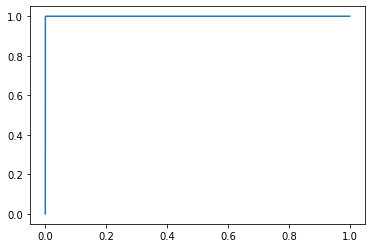

In [48]:
#Plotting ROC or (Receiving Operator Characteristic) curve for Model with Random Forest Classifier
rf_y_pred_proba = ks_rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  rf_y_pred_proba)
rf_auc = round(metrics.roc_auc_score(y_test, rf_y_pred_proba),4)*100
print('Random Forest AUC:',rf_auc)
plt.plot(fpr_rf,tpr_rf)

In [49]:
#Making a DataFrame with Actual Column
y_test = y_test.loc[:,].rename("actual approval")
y_test =pd.DataFrame(y_test)
y_test = y_test.reset_index().drop(columns='issue_d')

In [50]:
#Making a DataFrame with Prediction Column from Logistic Regression Model
y_test_pred = pd.Series(y_test_pred)
y_test_pred = y_test_pred.loc[:,].rename("predicted approval")
y_test_pred =pd.DataFrame(y_test_pred)

In [51]:
y_test_pred

,predicted approval
0,0
1,1
2,1
3,0
4,1
5,0
6,1
7,1
8,1
9,1


In [52]:
#Merge Actual and Prediction Column from Logistic Regression Model
logcomp = pd.merge(y_test_pred,y_test,right_index=True, left_index=True)

In [53]:
logcomp.head()

,predicted approval,actual approval
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


In [54]:
#Save into a CSV for future comparison
logcomp.to_csv('Log_Regression.csv') 

In [55]:
print('Suggested Acc with Logistic Regression:',
      len(logcomp[logcomp['predicted approval'] == logcomp['actual approval']])
      /len(logcomp)*100,'in comparison with the area under curve score of',logreg_auc*100)

Suggested Acc with Logistic Regression: 97.33120623947532 in comparison with the area under curve score of 9851.0


In [56]:
#Making a DataFrame with Prediction Column from the Random Forest Classifier Model
# rf_y_test_pred = pd.Series(rf_y_test_pred)
# rf_y_test_pred = pd.DataFrame(rf_y_test_pred)
rf_y_test_pred = rf_y_test_pred.loc[:,].rename("predicted approval")

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
#Merge Actual and Prediction Column from the Random Forest Classifier Model
rf_comp = pd.merge(rf_y_test_pred,y_test,right_index=True, left_index=True)

In [ ]:
rf_comp.head()

In [ ]:
#Save into a CSV for future comparison
rf_comp.to_csv('RandomForest.csv') 

In [ ]:
print('Suggested Acc with Random Forest:',
      len(rf_comp[rf_comp['predicted approval'] == rf_comp['actual approval']])
      /len(rf_comp)*100,'in comparison with the area under curve score of',rf_auc*100)

In [ ]:
#Save DataFrame into a CSV for future comparison
data.to_csv('XYZLending_Clean.csv') 